In [4]:
import os, csv

In [5]:
with open('titanic.csv','r') as infile:
    reader = csv.reader(infile)
    data = list(reader)

In [6]:
l = len(data) # no w sumie się zgadza, ale pierwsza lista/wiersz to opisy kolumn, więc mamy l-1 pasażerów
print(l)

892


In [7]:
for i in data[:]: # lista pasażerów będzie będzie "przyjemniejsza" dla oka przy przeglądaniu
    print(i)

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['1', '0', '3', 'Braund, Mr. Owen Harris', 'male', '22', '1', '0', 'A/5 21171', '7.25', '', 'S']
['2', '1', '1', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)', 'female', '38', '1', '0', 'PC 17599', '71.2833', 'C85', 'C']
['3', '1', '3', 'Heikkinen, Miss. Laina', 'female', '26', '0', '0', 'STON/O2. 3101282', '7.925', '', 'S']
['4', '1', '1', 'Futrelle, Mrs. Jacques Heath (Lily May Peel)', 'female', '35', '1', '0', '113803', '53.1', 'C123', 'S']
['5', '0', '3', 'Allen, Mr. William Henry', 'male', '35', '0', '0', '373450', '8.05', '', 'S']
['6', '0', '3', 'Moran, Mr. James', 'male', '', '0', '0', '330877', '8.4583', '', 'Q']
['7', '0', '1', 'McCarthy, Mr. Timothy J', 'male', '54', '0', '0', '17463', '51.8625', 'E46', 'S']
['8', '0', '3', 'Palsson, Master. Gosta Leonard', 'male', '2', '3', '1', '349909', '21.075', '', 'S']
['9', '1', '3', 'Johnson, Mrs. Oscar W (Elis

In [8]:
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline

In [9]:
def procent(x): # funkcja ma zwracać procent ocalałych/martwych w podanej przez użytkownika liście
    zw = 0 # liczba ocalałych
    zm = 0 # liczba ocalałych mężczyzn
    zk = 0 # liczba ocalałych kobiet
    mw = 0 # liczba nieocalałych
    mm = 0 # liczba nieocalałych mężczyzn
    mk = 0 # liczba nieocalałych kobiet
    pzw = 0 # procent ocalałych
    pzm = 0 # procent ocalałych mężczyzn
    pzk = 0 # procent ocalałych kobiet
    pmw = 0 # procent nieocalałych
    pmm = 0 # procent nieocalałych mężczyzn
    pmk = 0 # procent nieocalałych kobiet
    m = 0 # liczba mężczyzn
    k = 0 # liczba kobiet
    l = len(x)
    for i in range(l):
        if x[i][4] == 'male':
            m = m+1
        if x[i][4] == 'female':
            k = k+1
    for i in range(l):
        if x[i][1] == '1':
            zw = zw+1
    pzw = round(100*zw/(l-1),2) # przy zaokrąglaniu wynik nie zwraca tyle cyfr po przecinku, analogicznie niżej
    for i in range(l):
        if x[i][1] == '1' and data[i][4] == 'male':
            zm = zm+1
    pzm = round(100*zm/m,2)
    for i in range(l):
        if x[i][1] == '1' and data[i][4] == 'female':
            zk = zk+1
    pzk = round(100*zk/k,2)
    for i in range(l):
        if x[i][1] == '0':
            mw = mw+1
    pmw = round(100*mw/(l-1),2)
    for i in range(l):
        if x[i][1] == '0' and data[i][4] == 'male':
            mm = mm+1
    pmm = round(100*mm/m,2)
    for i in range(l):
        if x[i][1] == '0' and data[i][4] == 'female':
            mk = mk+1
    pmk = round(100*mk/k,2)
    # powyższe pętle można zbić nawet do jednej pętli, ale przy pisaniu kod się zmieniał i tak wyszło - ważne, że działa :)
    print('Przeżyło',pzw,'procent pasażerów:\n\t',pzm,'procent mężczyzn\n\t',pzk,'procent kobiet')
    print('Zginęło',pmw,'procent pasażerów:\n\t',pmm,'procent mężczyzn\n\t',pmk,'procent kobiet')
    # print(pzw+pmw,pzk+pmk,pzm+pmm) # jeśli zwróci same setki, to znaczy, że funkcja dobrze obliczyła procenty

In [10]:
procent(data)

Przeżyło 38.38 procent pasażerów:
	 18.89 procent mężczyzn
	 74.2 procent kobiet
Zginęło 61.62 procent pasażerów:
	 81.11 procent mężczyzn
	 25.8 procent kobiet


In [11]:
def slownik(x):
    l = len(x)
    z = 0 # liczba ocalałych
    m = 0 # liczba nieocalałych
    n = 0 # nieznany
    for i in range(l):
        if x[i][1] == '0':
            m = m+1
        elif x[i][1] == '1':
            z = z+1
        else:
            n = n+1 # dla listy pasażerów Titanica powinno zwrócić tylko jeden przypadek - pierwszy wiersz
    s = {'żywi': z, 'martwi': m, 'nieznany': n}
    return s

In [12]:
slownik(data)

{'martwi': 549, 'nieznany': 1, 'żywi': 342}

In [13]:
def srednia(x):
    l = len(x)
    m = 0 # liczba mężczyzn z podanym wiekiem
    wm = 0 # wiek mężczyzn (suma) z podanym wiekiem
    k = 0 # liczba kobiet z podanym wiekiem
    wk = 0 # wiek kobiet (suma) z podanym wiekiem
    w = 0 # liczba wszystkich pasażerów z podanym wiekiem
    ww = 0 # wiek wszystkich pasażerów (suma) z podanym wiekiem
    for i in range(l):
        if x[i][4] == 'male':
            try:
                m = m+1
                wm = wm + float(x[i][5])
            except ValueError: # zastosowana składnia try: ... except ValueError: ... ponieważ nie przy każdym podany jest wiek
                pass
        if x[i][4] == 'female':
            try:
                k = k+1
                wk = wk + float(x[i][5])
            except ValueError:
                pass
    w = k+m
    ww = wk+wm
    sm = wm/m
    sk = wk/k
    sw = ww/w
    return sm, sk, sw # srednie uwzględniają tylko tych pasażerów z listy, którzy mieli podany wiek

In [14]:
srednia(data)

(24.123344887348352, 23.203821656050955, 23.79929292929293)

In [42]:
def histogram(x):
    l = len(x)
    m = 0 # liczba mężczyzn z podanym wiekiem
    wm = [] # wiek mężczyzn z podanym wiekiem
    k = 0 # liczba kobiet z podanym wiekiem
    wk = [] # wiek kobiet z podanym wiekiem
    w = 0 # liczba wszystkich pasażerów z podanym wiekiem
    ww = [] # wiek wszystkich pasażerów z podanym wiekiem
    for i in range(l):
        if x[i][4] == 'male':
            try:
                m = m+1
                wm.append(float(x[i][5]))
            except ValueError:
                pass
        if x[i][4] == 'female':
            try:
                k = k+1
                wk.append(float(x[i][5]))
            except ValueError:
                pass
    w = k+m
    ww = wk+wm
    am = np.array(wm) # array z wiekiem mężczyzn z podanym wiekiem
    ak = np.array(wk) # array z wiekiem kobiet z podanym wiekiem
    aw = np.array(ww) # array z wiekiem wszystkich pasażerów z podanym wiekiem
    
    hm = mpl.hist(wm, facecolor='tab:blue')
    mpl.xlabel('Wiek')
    mpl.ylabel('Mężczyźni')
    mpl.title('Histogram wieku mężczyzn')
    mpl.grid(True)
    mpl.show(hm)
        
    hk = mpl.hist(wk, facecolor='tab:red')
    mpl.xlabel('Wiek')
    mpl.ylabel('Kobiety')
    mpl.title('Histogram wieku kobiet')
    mpl.grid(True)
    mpl.show(hk)
    
    hw = mpl.hist(ww, facecolor='tab:purple')
    mpl.xlabel('Wiek')
    mpl.ylabel('Pasażerowie')
    mpl.title('Histogram wieku pasażerów')
    mpl.grid(True)
    mpl.show(hw)
    # można by było jeszcze ustalić ilość słupków (np. równą wiekowi najstarszego pasażera w zadanym zbiorze) oraz
    # ustalić długości osi, ale histogram wygląda wtedy brzydko i słabo czytelnie, więc lepiej się zdać na intuicję pythona
    # brak polecenia return (chciałem 3 histogramy na 3 osobnych wykresach, return próbuje je upchnąć na jeden)

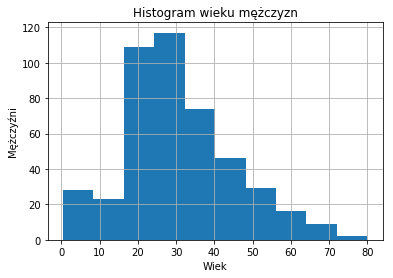

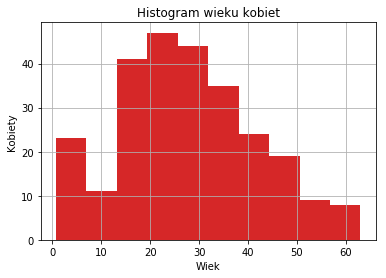

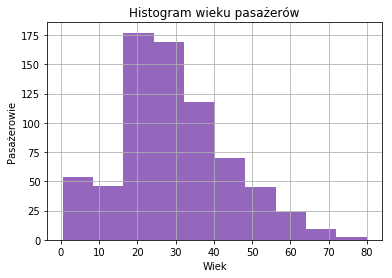

In [43]:
histogram(data)

In [17]:
def nazwiska(x):
    l = len(x)
    
    im = [] # lista imion i nazwisk mężczyzn
    for i in range(l):
        if x[i][4] == 'male':
            im.append(x[i][3])
    lm = len(im) # liczba mężczyzn
    nm = [] # lista samych nazwisk mężczyzn
    for i in range(lm):
        j = 0
        while im[i][j] != ',':
            j += 1
        nm.append(im[i][:j])
    nm.sort()
    dm = 0 # największa liczba powtarzających się nazwisk mężczyzn
    for i in range(lm):
        if nm.count(nm[i]) > dm:
            dm = nm.count(nm[i])
    wm = [] # najczęściej pojawiające się nazwiska mężczyzn
    while len(wm) < 4:
        for i in range(lm):
            if nm.count(nm[i]) == dm and wm.count(nm[i]) == 0: # drugi warunek zapobiega wpisywaniu ponownie identycznego nazwiska
                wm.append(nm[i])
        dm -= 1
    while len(wm) > 3:
        wm.pop(len(wm)-1) # funkcja usuwa nadmiar nazwisk, jeśli zbyt dużo występowało tą samą ilość razy
        
    ik = [] # lista imion i nazwisk kobiet
    for i in range(l):
        if x[i][4] == 'female':
            ik.append(x[i][3])
    lk = len(ik) # liczba kobiet
    nk = [] # lista samych nazwisk kobiet
    for i in range(lk):
        j = 0
        while ik[i][j] != ',':
            j += 1
        nk.append(ik[i][:j])
    nk.sort()
    dk = 0 # największa liczba powtarzających się nazwisk kobiet
    for i in range(lk):
        if nk.count(nk[i]) > dk:
            dk = nk.count(nk[i])
    wk = [] # najczęściej powtarzające się nazwiska kobiet
    while len(wk) < 4:
        for i in range(lk):
            if nk.count(nk[i]) == dk and wk.count(nk[i]) == 0: # drugi warunek zapobiega wpisywaniu ponownie identycznego nazwiska
                wk.append(nk[i])
        dk -= 1
    while len(wk) > 3:
        wk.pop(len(wk)-1) # funkcja usuwa nadmiar nazwisk, jeśli zbyt dużo występowało tą samą ilość razy
        
    return wm, wk
    # funkcja najpierw zwraca listę trzech najczęstrzych nazwisk mężczyzn, następnie listę trzech najczęstrzych nazwisk kobiet

In [18]:
nazwiska(data)

(['Panula', 'Goodwin', 'Gustafsson'], ['Andersson', 'Baclini', 'Brown'])

In [68]:
def klasy(x):
    m1 = 0
    m2 = 0
    m3 = 0
    k1 = 0
    k2 = 0
    k3 = 0
    lm1 = []
    lm2 = []
    lm3 = []
    lk1 = []
    lk2 = []
    lk3 = []
    l = len(x)
    for i in range(l):
        if x[i][2]=='1' and x[i][4]=='male':
            m1 += 1
            lm1.append(1)
    for i in range(l):
        if x[i][2]=='2' and x[i][4]=='male':
            m2 += 1
            lm2.append(3)
    for i in range(l):
        if x[i][2]=='3' and x[i][4]=='male':
            m3 += 1
            lm3.append(5)
    for i in range(l):
        if x[i][2]=='1' and x[i][4]=='female':
            k1 += 1
            lk1.append(2)
    for i in range(l):
        if x[i][2]=='2' and x[i][4]=='female':
            k2 += 1
            lk2.append(4)
    for i in range(l):
        if x[i][2]=='3' and x[i][4]=='female':
            k3 += 1
            lk3.append(6)
    lm = lm1+lm2+lm3
    lk = lk1+lk2+lk3
    
    wm = np.array(lm)
    wk = np.array(lk)
    
    hm = mpl.hist(wm,wk)
    

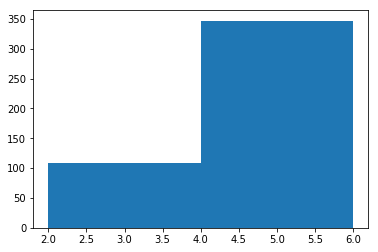

In [69]:
klasy(data)